The data set encompasses 39,953 locations for 9,924 disasters that occurred worldwide in the years 1960 to 2018. All floods, storms (typhoons, monsoons etc.), earthquakes, landslides, droughts, volcanic activity and extreme temperatures that were recorded in EM-DAT during these 58 years and could be geocoded are included in the data set. The highest spatial resolution in the data set corresponds to administrative level 3 (usually district/commune/village) in the Global Administrative Areas database (GADM, 2018). The vast majority of the locations are administrative level 1 (typically state/province/region).

In [1]:
# !pip install jupyter_bokeh
import pandas as pd
import numpy as np
import hvplot.pandas
import holoviews as hv
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from citipy import citipy

csv_file = 'Resources/pend-gdis-1960-2018-disasterlocations.csv'

In [2]:
def geo_plot_by_decade(df, decade, title):
    points_to_chart = df.loc[df['decade'] == decade]
    # Create the map plot
    map_plot = points_to_chart.hvplot.points(
        "longitude",
        "latitude",
        # Configure the map plot
        geo="True", # show geo data
        tiles="OSM",  # OpenStreetMap tiles
        frame_width=700,
        frame_height=500,
        size='level',  # Size of the points determined by Humidity
        color="decade",  # Color by city
        scale=1,
        title=title
    )
    hv.save(map_plot, f'output/hvplot_{title}.png', fmt='png')
    # Display the map
    return map_plot

In [3]:
def geo_plot_by_decade2(df):
        # Create the map plot
    map_plot = df.hvplot.points(
        "longitude",
        "latitude",
        # Configure the map plot
        geo="True", # show geo data
        tiles="OSM",  # OpenStreetMap tiles
        frame_width=700,
        frame_height=500,
        size='Scaled Size',  # Size of the points determined by Humidity
        color='count',  # Color by city
        scale=1,
        cmap='Rainbow',
        xlim=(-180, 180),  
        ylim=(-75, 75),
        groupby=['decade', 'disastertype'],
        hover_cols=['approximate_location','country','count']
    )
    hv.save(map_plot, f'output/storm_count_by_decade.png', fmt='png')
    # Display the map
    return map_plot

In [4]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x, y, xlabel, ylabel, title): #, hemisphere):
    # Set data ranges for formatting plots 
    x_min = min(x)
    x_max = max(x)
    x_range = x_max - x_min
    y_min = min(y)
    y_max = max(y)
    y_range = y_max - y_min
    
    # Calc regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    # Calc regress values for y values on line 
    regress_values = x * slope + intercept
    # Format regression equation for display
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Print the r^2 value
    print(f'The r^2-value is: {rvalue**2}')
    
    # plot the regression
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,
                 (x_min+x_range*0.05,y_max+y_range*0.1),
                 fontsize=15,
                 color="red")
   
    # plot the data
    plt.scatter(x, y)
    
    # Format plt
    plt.axis([x_min-x_range*0.05, 
              x_max+x_range*0.05, 
              y_min-y_range*0.05, 
              y_max+y_range*0.2])
    plt.title(f'{title}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    plt.savefig(f'output/linear_regression_{title}.png')
    # Show plot
    plt.show()

In [5]:
def get_nearest_city(row):
    try:
        return citipy.nearest_city(row["latitude"], row["longitude"]).city_name
    except:
        return "N/A"

In [6]:
# read in csv file
import_df = pd.read_csv(csv_file)
# clean up DF
df = import_df[['id','country','year','level','location','disastertype','disasterno','latitude','longitude']]
df.head()

,id,country,year,level,location,disastertype,disasterno,latitude,longitude
0,109,Albania,2009,3,Ana E Malit,flood,2009-0631,42.020948,19.418317
1,109,Albania,2009,3,Bushat,flood,2009-0631,41.959294,19.514309
2,175,Angola,2001,3,Onjiva,flood,2001-0146,-17.093484,15.665758
3,187,Angola,2009,3,Evale,flood,2009-0092,-16.531533,15.773987
4,187,Angola,2009,3,Mupa,flood,2009-0092,-16.200065,15.844189


In [7]:
# Creation of clean data frame
clean_df = df[['id','country','year','level','location','disastertype','disasterno','latitude','longitude']]
df = clean_df # make df = clean_df to combine files and maintain functions
clean_df.head()

,id,country,year,level,location,disastertype,disasterno,latitude,longitude
0,109,Albania,2009,3,Ana E Malit,flood,2009-0631,42.020948,19.418317
1,109,Albania,2009,3,Bushat,flood,2009-0631,41.959294,19.514309
2,175,Angola,2001,3,Onjiva,flood,2001-0146,-17.093484,15.665758
3,187,Angola,2009,3,Evale,flood,2009-0092,-16.531533,15.773987
4,187,Angola,2009,3,Mupa,flood,2009-0092,-16.200065,15.844189


The r^2-value is: 0.7991873523638864


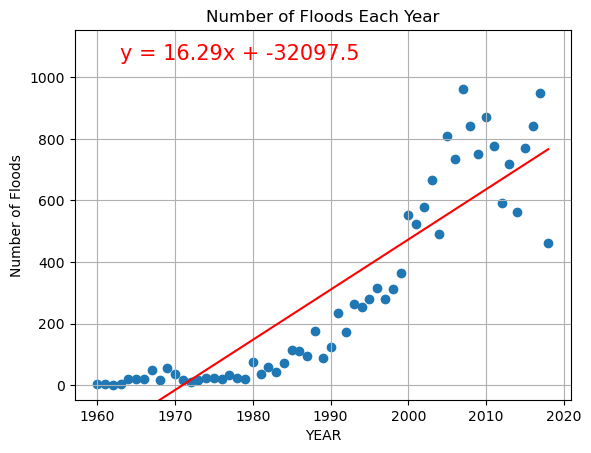

In [8]:
floods_df = pd.DataFrame(df.loc[df['disastertype'] == 'flood', 'year'])
floods_by_year = floods_df.groupby('year').value_counts()
fby_df = pd.DataFrame(floods_by_year).reset_index()

x = fby_df['year']
y = fby_df['count']

plot_linear_regression(x, y, 'YEAR', 'Number of Floods', 'Number of Floods Each Year')

The r^2-value is: 0.805916332428345


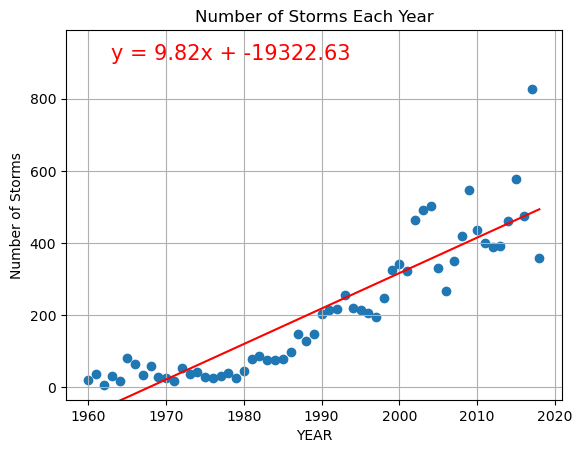

In [9]:
s_df = pd.DataFrame(df.loc[df['disastertype'] == 'storm', 'year'])
s_by_year = s_df.groupby('year').value_counts()
sby_df = pd.DataFrame(s_by_year).reset_index()

x = sby_df['year']
y = sby_df['count']

plot_linear_regression(x, y, 'YEAR', 'Number of Storms', 'Number of Storms Each Year')

The r^2-value is: 0.6120364642004856


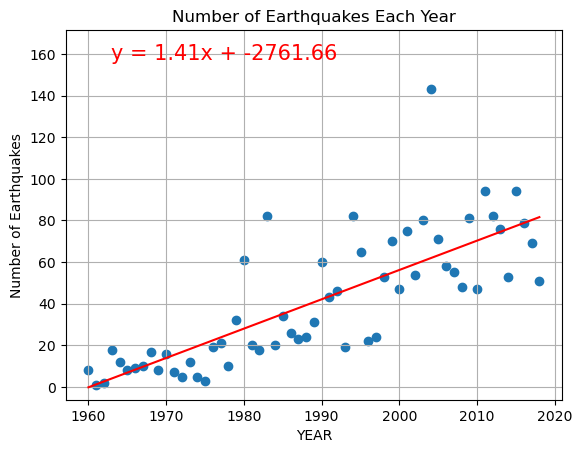

In [10]:
eq_df = pd.DataFrame(df.loc[df['disastertype'] == 'earthquake', 'year'])
eq_by_year = eq_df.groupby('year').value_counts()
eqby_df = pd.DataFrame(eq_by_year).reset_index()

x = eqby_df['year']
y = eqby_df['count']

plot_linear_regression(x, y, 'YEAR', 'Number of Earthquakes', 'Number of Earthquakes Each Year')

The r^2-value is: 0.32156106562606984


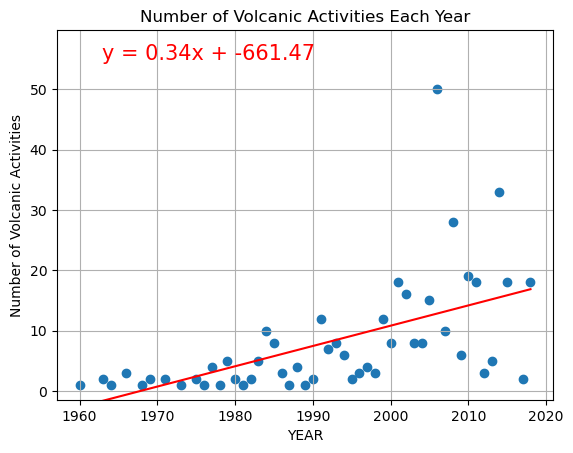

In [11]:
v_df = pd.DataFrame(df.loc[df['disastertype'] == 'volcanic activity', 'year'])
v_by_year = v_df.groupby('year').value_counts()
vby_df = pd.DataFrame(v_by_year).reset_index()

x = vby_df['year']
y = vby_df['count']

plot_linear_regression(x, y, 'YEAR', 'Number of Volcanic Activities', 'Number of Volcanic Activities Each Year')

In [12]:
disaster_count_df = clean_df.drop_duplicates(subset = ['id']).groupby(['level'])['disastertype'].count()
disaster_count_df.head()

level
1    5965
2    3237
3     722
Name: disastertype, dtype: int64

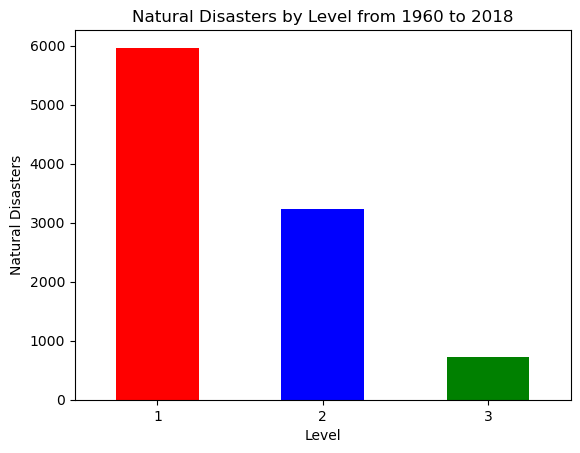

In [13]:
# Creation of bar graph showcasing different levels
disaster_count_df.plot(kind = 'bar', title = 'Natural Disasters by Level from 1960 to 2018', xlabel = 'Level', ylabel = 'Natural Disasters',color = ['red','blue','green'])
plt.xticks(rotation='horizontal')
plt.show()

In [14]:
storms_per_city = clean_df.groupby(['location','latitude','longitude'])['disasterno'].count()
storms_per_city.reset_index()
storms_per_city

new_clean_df = clean_df.copy()
new_clean_df['approximate_location'] = new_clean_df.apply(get_nearest_city, axis=1)
new_clean_df['approximate_location'] = new_clean_df['approximate_location'].str.capitalize()
new_clean_df.to_csv('output/clean_df.csv', index = False)
new_clean_df.head()

,id,country,year,level,location,disastertype,disasterno,latitude,longitude,approximate_location
0,109,Albania,2009,3,Ana E Malit,flood,2009-0631,42.020948,19.418317,Shkoder
1,109,Albania,2009,3,Bushat,flood,2009-0631,41.959294,19.514309,Shkoder
2,175,Angola,2001,3,Onjiva,flood,2001-0146,-17.093484,15.665758,Ondjiva
3,187,Angola,2009,3,Evale,flood,2009-0092,-16.531533,15.773987,Ondjiva
4,187,Angola,2009,3,Mupa,flood,2009-0092,-16.200065,15.844189,Ondjiva


In [15]:
# Insert decades data into df
decades = new_clean_df.copy()
bins = [1960,1970,1980,1990,2000,2010,2020]
group_names = ['1960s','1970s','1980s','1990s','2000s','2010s']
decades['decade'] = pd.cut(df['year'],
                           bins, labels=group_names, 
                           include_lowest=True)
decades.head()


,id,country,year,level,location,disastertype,disasterno,latitude,longitude,approximate_location,decade
0,109,Albania,2009,3,Ana E Malit,flood,2009-0631,42.020948,19.418317,Shkoder,2000s
1,109,Albania,2009,3,Bushat,flood,2009-0631,41.959294,19.514309,Shkoder,2000s
2,175,Angola,2001,3,Onjiva,flood,2001-0146,-17.093484,15.665758,Ondjiva,2000s
3,187,Angola,2009,3,Evale,flood,2009-0092,-16.531533,15.773987,Ondjiva,2000s
4,187,Angola,2009,3,Mupa,flood,2009-0092,-16.200065,15.844189,Ondjiva,2000s


In [16]:
# I want to group by approximate _location_de
approximate_location_count = decades.groupby(['disastertype','approximate_location', 'decade']).size().reset_index(name='count')
locations_df = decades.drop_duplicates(subset = 'approximate_location')[['approximate_location','latitude','longitude','country']]
#['latitude','longitude','country'].reset_index()
storm_count_by_decade = pd.merge(approximate_location_count,locations_df, how='left',on='approximate_location')
storm_count_by_decade = storm_count_by_decade[(storm_count_by_decade['count'] != 0)].reset_index()
storm_count_by_decade['Scaled Size'] = storm_count_by_decade.apply(lambda x: x['count'] * 25, axis = 1)
storm_count_by_decade.head()

/var/folders/nn/h8r4zj6x03jgg9nnxtcg6n0h0000gn/T/ipykernel_51312/2719678366.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approximate_location_count = decades.groupby(['disastertype','approximate_location', 'decade']).size().reset_index(name='count')


,index,disastertype,approximate_location,decade,count,latitude,longitude,country,Scaled Size
0,27,drought,'ali sabieh,1990s,1,11.243546,42.905201,Djibouti,25
1,28,drought,'ali sabieh,2000s,4,11.243546,42.905201,Djibouti,100
2,56,drought,Abancay,1980s,1,-13.732697,-72.834497,Peru,25
3,58,drought,Abancay,2000s,1,-13.732697,-72.834497,Peru,25
4,100,drought,Abeche,2000s,2,13.540096,21.156536,Chad,50


In [17]:
# Riley
geo_plot_by_decade2(storm_count_by_decade)

:DynamicMap   [decade,disastertype]
   :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [longitude,latitude]   (count,Scaled Size,approximate_location,country)

In [18]:
geo_plot_by_decade(decades, '1960s', 'Location of Floods in 1960s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [19]:
floods_w_decades = decades.loc[decades['disastertype'] == 'flood']
geo_plot_by_decade(floods_w_decades, '1970s', 'Location of Floods in 1970s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [20]:
geo_plot_by_decade(floods_w_decades, '1980s', 'Location of Floods in 1980s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [21]:
geo_plot_by_decade(floods_w_decades, '1990s', 'Location of Floods in 1990s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [22]:
geo_plot_by_decade(floods_w_decades, '2000s', 'Location of Floods in 2000s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [23]:
geo_plot_by_decade(floods_w_decades, '2010s', 'Location of Floods in 2010s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [24]:
points_to_chart = floods_w_decades
# Create the map plot
map_plot_floods = points_to_chart.hvplot.points(
    "longitude",
    "latitude",
    # Configure the map plot
    geo="True", # show geo data
    tiles="OSM",  # OpenStreetMap tiles
    frame_width=700,
    frame_height=500,
    size='level',  # Size of the points determined by Humidity
    color="year",  # Color by city
    scale=1,
    title="Locations of Floods 1960-2018"
)

# Display the map
map_plot_floods

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (year,level)

This dataset contains U.S. disaster cost assessments of the total, direct losses ($) inflicted by: tropical cyclones, inland floods, drought & heat waves, severe local storms (i.e., tornado, hail, straight-line wind damage), wildfires, crop freeze events and winter storms.

In [25]:
csv_file = 'Resources/events-US-1980-2024-Q3.csv'
df = pd.read_csv(csv_file)
df.head()

df.columns = df.iloc[1]

df = df.drop(df.index[0:2]).reset_index(drop=True)
df = df[pd.to_numeric(df['CPI-Adjusted Cost'], errors='coerce').notna()]
df[['CPI-Adjusted Cost','Unadjusted Cost', 'Deaths']]= df[['CPI-Adjusted Cost','Unadjusted Cost', 'Deaths']].astype(float)
df.head()

1,Name,Disaster,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths
0,Southern Severe Storms and Flooding (April 1980),Flooding,19800410,19800417,2742.3,706.8,7.0
1,Hurricane Allen (August 1980),Tropical Cyclone,19800807,19800811,2230.2,590.0,13.0
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,19800601,19801130,40480.8,10020.0,1260.0
3,Florida Freeze (January 1981),Freeze,19810112,19810114,2070.6,572.0,0.0
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,19810505,19810510,1405.2,401.4,20.0


The r^2-value is: 0.3558678491695028


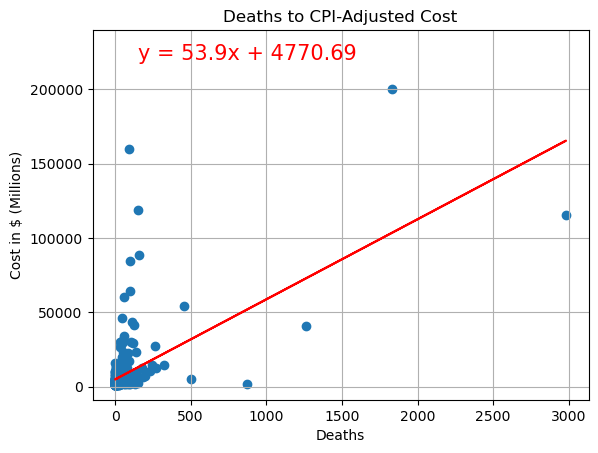

In [26]:
plot_linear_regression(df['Deaths'], df['CPI-Adjusted Cost'], 'Deaths', 'Cost in $ (Millions)', 'Deaths to CPI-Adjusted Cost')

The r^2-value is: 0.9563205381665671


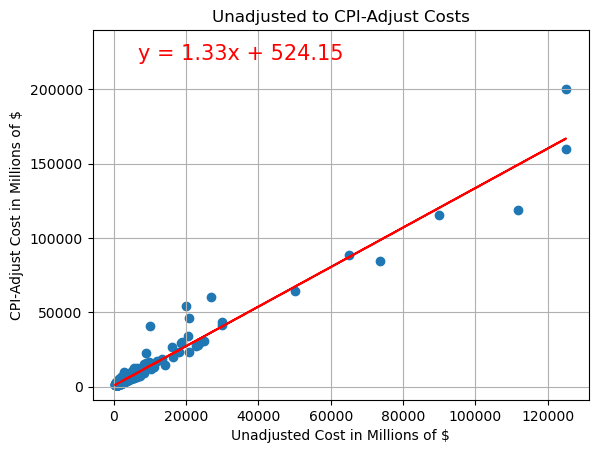

In [27]:
plot_linear_regression(df['Unadjusted Cost'], df['CPI-Adjusted Cost'], 'Unadjusted Cost in Millions of $', 'CPI-Adjust Cost in Millions of $', 'Unadjusted to CPI-Adjust Costs')

In [28]:
tropical_cyclones = df[(df['Disaster'] == 'Tropical Cyclone')].copy()

df['Begin Date'] = pd.to_datetime(df['Begin Date'], format='%Y%m%d')
df['End Date'] = pd.to_datetime(df['End Date'], format='%Y%m%d')

# Calculate the duration in days
df['Duration'] = (df['End Date'] - df['Begin Date']).dt.days
df.sort_values(['Deaths'],ascending=False).head()

1,Name,Disaster,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths,Duration
255,Hurricane Maria (September 2017),Tropical Cyclone,2017-09-19,2017-09-21,115200.0,90000.0,2981.0,2
119,Hurricane Katrina (August 2005),Tropical Cyclone,2005-08-25,2005-08-30,200047.3,125029.5,1833.0,5
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-06-01,1980-11-30,40480.8,10020.0,1260.0,182
64,"Central, Southern and Northeast Drought/Heat W...",Drought,1995-07-01,1995-09-30,2017.6,984.0,872.0,91
88,Eastern Drought/Heat Wave (Summer 1999),Drought,1999-06-01,1999-08-31,4772.8,2498.9,502.0,91


The r^2-value is: 0.3558678491695028


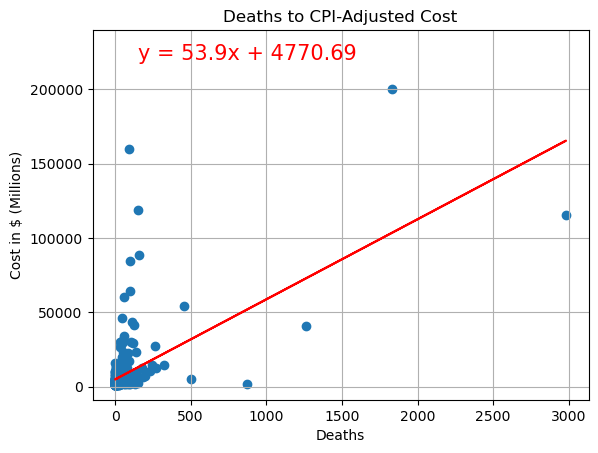

In [29]:
# !!! IS THIS A REPEAT??? !!!
plot_linear_regression(df['Deaths'], df['CPI-Adjusted Cost'], 'Deaths', 'Cost in $ (Millions)', 'Deaths to CPI-Adjusted Cost')

The r^2-value is: 0.0045154512665179156


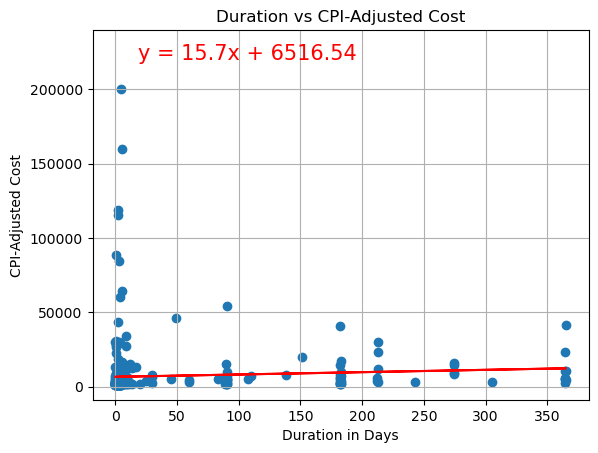

In [30]:
plot_linear_regression(df['Duration'], df['CPI-Adjusted Cost'], 'Duration in Days', 'CPI-Adjusted Cost', 'Duration vs CPI-Adjusted Cost')

In [37]:
print(df.head())
df['Disaster'].unique()

1                                               Name          Disaster  \
0   Southern Severe Storms and Flooding (April 1980)          Flooding   
1                      Hurricane Allen (August 1980)  Tropical Cyclone   
2  Central/Eastern Drought/Heat Wave (Summer-Fall...           Drought   
3                      Florida Freeze (January 1981)            Freeze   
4  Severe Storms, Flash Floods, Hail, Tornadoes (...      Severe Storm   

1 Begin Date   End Date  CPI-Adjusted Cost  Unadjusted Cost  Deaths  Duration  
0 1980-04-10 1980-04-17             2742.3            706.8     7.0         7  
1 1980-08-07 1980-08-11             2230.2            590.0    13.0         4  
2 1980-06-01 1980-11-30            40480.8          10020.0  1260.0       182  
3 1981-01-12 1981-01-14             2070.6            572.0     0.0         2  
4 1981-05-05 1981-05-10             1405.2            401.4    20.0         5  


array(['Flooding', 'Tropical Cyclone', 'Drought', 'Freeze',
       'Severe Storm', 'Winter Storm', 'Wildfire'], dtype=object)

In [39]:
# Put types into a list for for loop (and later for plot labels)
types = ['Flooding', 'Tropical Cyclone', 'Drought', 'Freeze', 'Severe Storm', 'Winter Storm', 'Wildfire']

# Create empty list to fill with costs data (for plotting)
costs = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for disaster in types:
    outliers = []

    # Locate the rows which contain each disaster
    cost_data = df.loc[df['Disaster'] == disaster, 'CPI-Adjusted Cost'].astype(float).tolist()

    # add subset

    costs.append(cost_data)

    # Convert to a Pandas Series
    cost_series = pd.Series(cost_data)
    
    # Determine quartiles
    quartiles = cost_series.quantile([0.25, 0.5, 0.75])
    
    # Determine outliers using upper and lower bounds
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    for volume in cost_data:
        if volume < lower_bound or volume > upper_bound:
            outliers.append(volume)
   

/var/folders/nn/h8r4zj6x03jgg9nnxtcg6n0h0000gn/T/ipykernel_51312/1933543963.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(costs,


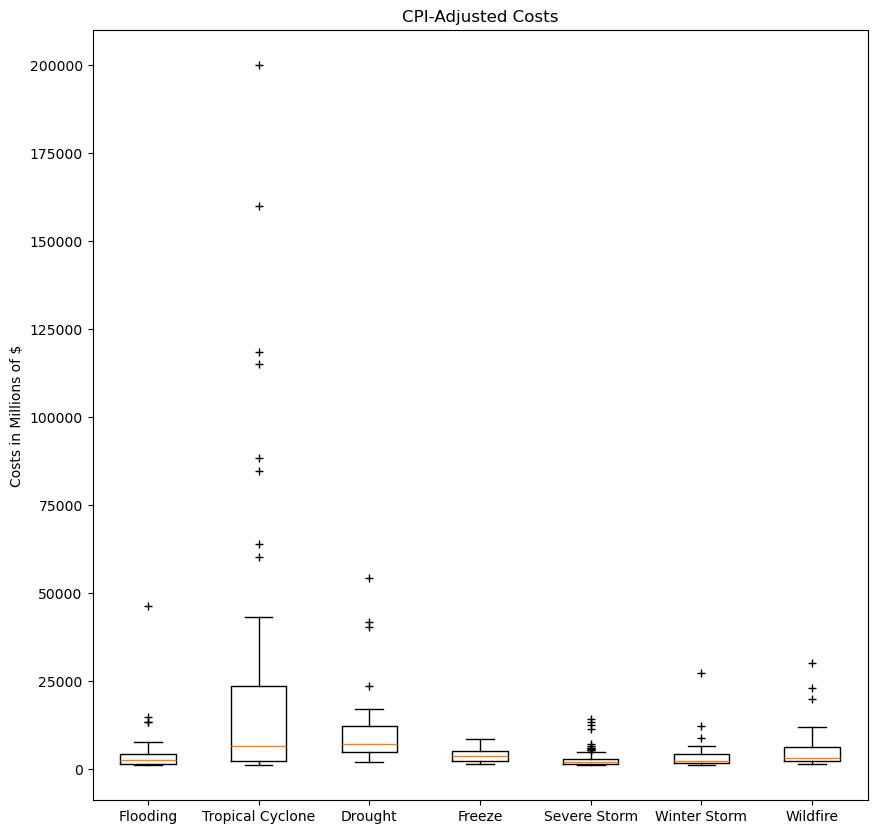

In [52]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('CPI-Adjusted Costs')
ax1.set_ylabel('Costs in Millions of $')
flierprops = dict(marker='+', 
                  color='red')
ax1.boxplot(costs, 
            labels=types, 
            flierprops=flierprops)
plt.show()

/var/folders/nn/h8r4zj6x03jgg9nnxtcg6n0h0000gn/T/ipykernel_51312/103277560.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(costs,


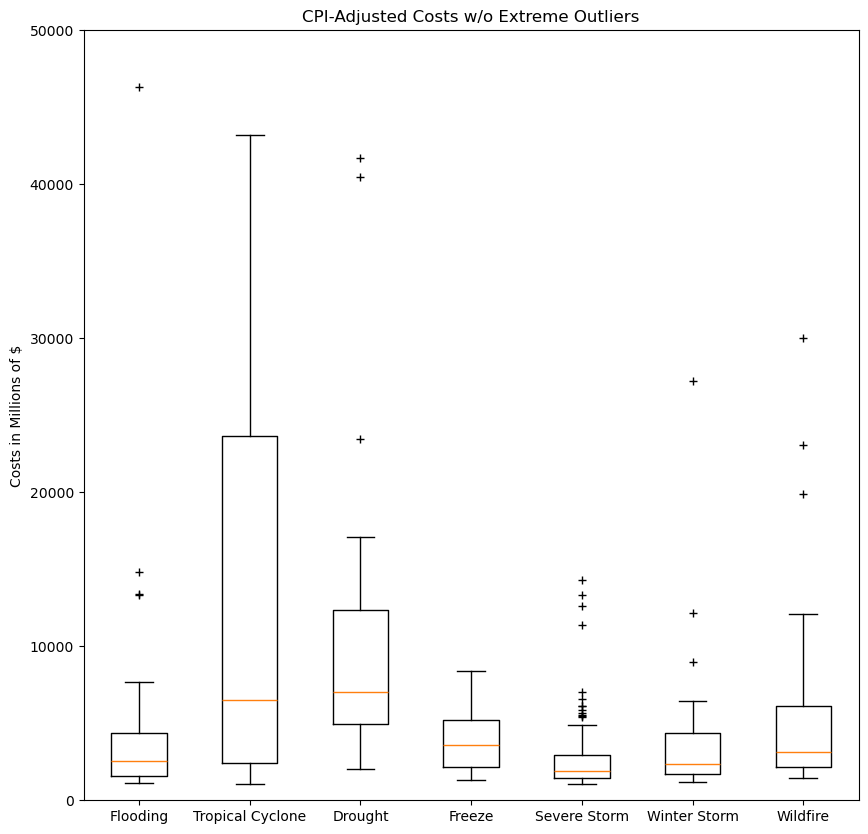

In [51]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('CPI-Adjusted Costs w/o Extreme Outliers')
ax1.set_ylabel('Costs in Millions of $')
ax1.set_ylim(0, 50000)
flierprops = dict(marker='+', 
                  color='red')
ax1.boxplot(costs, 
            labels=types, 
            flierprops=flierprops)
plt.show()

In [42]:
# Re-use types from the previous box plots
# Create empty list to fill with costs data (for plotting)
deaths = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for disaster in types:
    outliers = []

    # Locate the rows which contain each disaster
    death_data = df.loc[df['Disaster'] == disaster, 'Deaths'].astype(float).tolist()

    # add subset

    deaths.append(death_data)

    # Convert to a Pandas Series
    death_series = pd.Series(death_data)
    
    # Determine quartiles
    quartiles = death_series.quantile([0.25, 0.5, 0.75])
    
    # Determine outliers using upper and lower bounds
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    for volume in death_data:
        if volume < lower_bound or volume > upper_bound:
            outliers.append(volume)
   

/var/folders/nn/h8r4zj6x03jgg9nnxtcg6n0h0000gn/T/ipykernel_51312/1187043628.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(deaths,


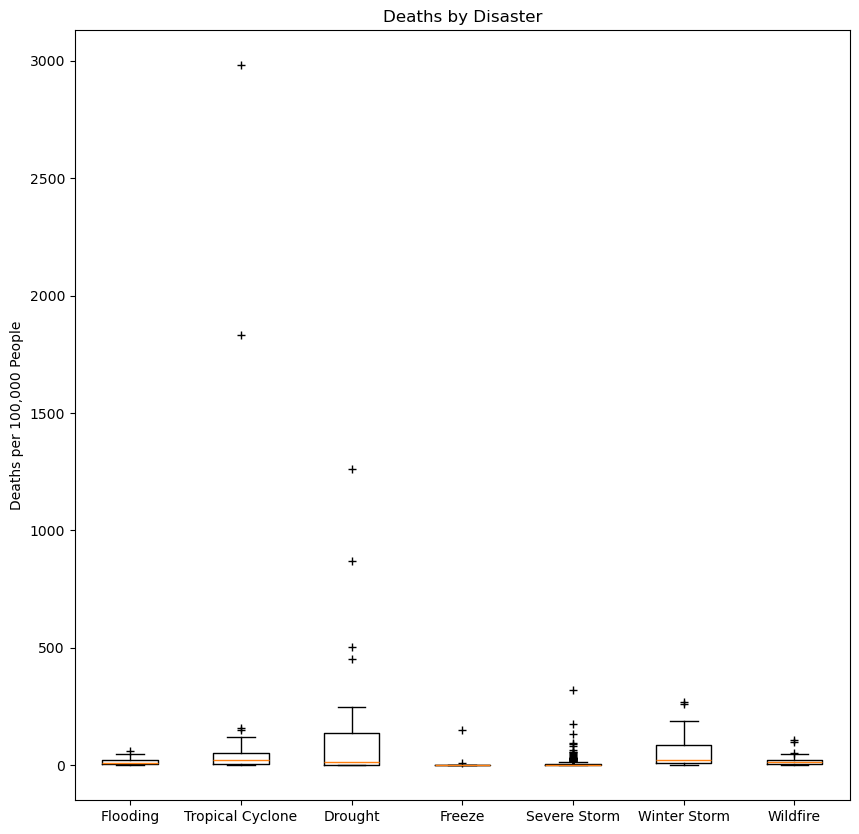

In [49]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.set_title('Deaths by Disaster')
ax2.set_ylabel('Deaths per 100,000 People')
flierprops = dict(marker='+', 
                  color='red')
ax2.boxplot(deaths, 
            labels=types, 
            flierprops=flierprops)
plt.show()

/var/folders/nn/h8r4zj6x03jgg9nnxtcg6n0h0000gn/T/ipykernel_51312/1831750028.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(deaths,


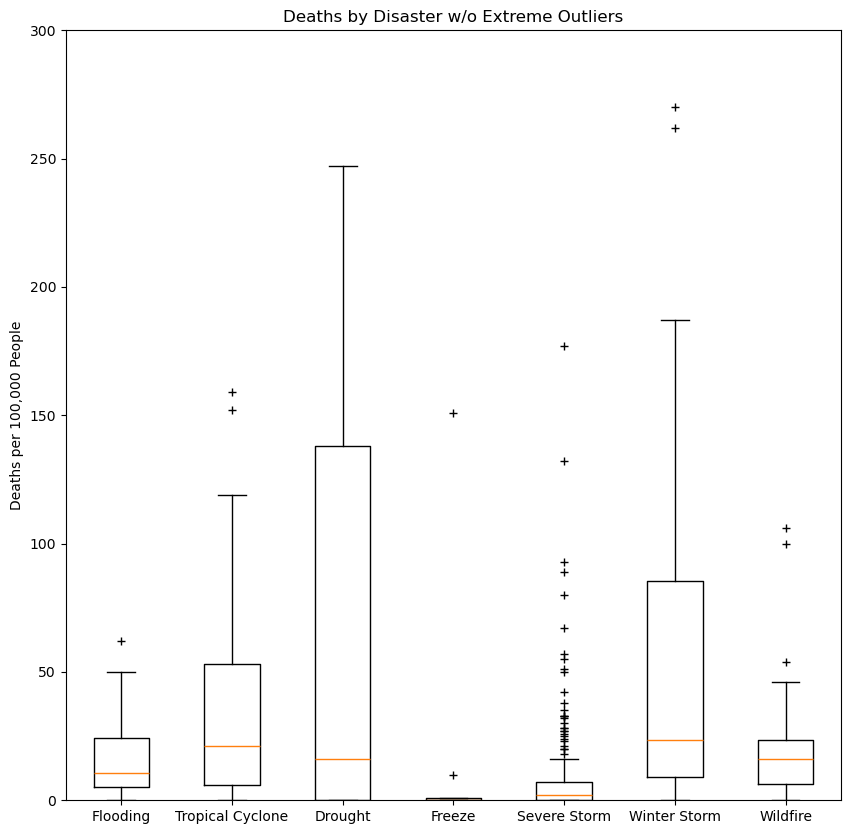

In [50]:
fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.set_title('Deaths by Disaster w/o Extreme Outliers')
ax2.set_ylabel('Deaths per 100,000 People')
ax2.set_ylim(0, 300)
flierprops = dict(marker='+', 
                  color='red')
ax2.boxplot(deaths, 
            labels=types, 
            flierprops=flierprops)
plt.show()